### Test migration history reconstruction on breast cancer data


In [1]:
import sys
import os

repo_dir = os.path.join(os.getcwd(), "../../")

from metient.util.globals import *
from metient.metient import *
from metient.util import pairtree_data_extraction_util as ptutil
from metient.util import data_extraction_util as dutil

import matplotlib
import torch
import pandas as pd

matplotlib.rcParams['figure.figsize'] = [3, 3]
custom_colors = ["#6aa84f","#c27ba0", "#be5742e1", "#6fa8dc", "#e69138", "#9e9e9e"]
HOADLEY_DATA_DIR = os.path.join(repo_dir, 'data/hoadley_breast_cancer_2016')
MSK_MET_FN = os.path.join(repo_dir, 'data/msk_met/msk_met_freq_by_cancer_type.csv')
OUTPUT_DIR = os.path.join(repo_dir, 'data', 'hoadley_breast_cancer_2016')

CUDA GPU: False


In [2]:
HOAD_MSK_MET_MAP = {
    "liver": "Liver",
    "brain": "CNS/Brain",
    "rib": "Bone",
    "breast": "Breast",
    "kidney": "Kidney",
    "lung": "Lung",
    "adrenal": "Adrenal Gland",
    "spinal": "CNS/Brain"
}

print_config = PrintConfig(visualize=True, verbose=True, k_best_trees=20)

def run_evaluate(patient_id, custom_colors, weights, run_name):
    mut_trees_fn = os.path.join(HOADLEY_DATA_DIR, "orchard_trees", f"{patient_id}.results.npz")
    ref_var_fn = os.path.join(HOADLEY_DATA_DIR, "pyclone_clustered_tsvs", f"{patient_id}_SNVs.tsv")
    df = pd.read_csv(ref_var_fn, delimiter="\t")
    sorted_tuples = sorted(zip(df['anatomical_site_index'].unique(), df['anatomical_site_label'].unique()))
    unique_sites = [t[1] for t in sorted_tuples]
    trees = ptutil.get_adj_matrices_from_pairtree_results(mut_trees_fn)
    print("num trees:", len(trees))
    print(unique_sites)
    tree_num = 1
    for adj_matrix in trees:
        print(f"\nTREE {tree_num}")
        O = dutil.get_organotropism_matrix_from_msk_met(unique_sites, "Breast Cancer", MSK_MET_FN, HOAD_MSK_MET_MAP)
        print("organotropism",O)
        if weights.organotrop == 0.0: O = None
        
        evaluate(adj_matrix,  ref_var_fn,weights, print_config, OUTPUT_DIR, f"{run_name}_tree{tree_num}",
                 O=O, custom_colors=custom_colors, solve_polytomies=False)
        tree_num += 1



### Initialize two sets of weights, one with max. pars. + gen dist, one with max. pars + gen. dist. + organotrop

In [4]:
# Use default maximum parsimony weights
weights = Weights(gen_dist=0.1, organotrop=0.0)
organo_weights = Weights(gen_dist=0.1, organotrop=0.1)


### Patient A1, maximum parsimony + gen. dist. objective

num trees: 2
['breast', 'adrenal', 'liver', 'lung', 'spinal']

TREE 1
organotropism tensor([0.02, 0.01, 0.12, 0.08, 0.06])
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016/tmp_A1_eval_gd_tree1_clustered_SNVs.tsv
ordered_sites ['breast', 'adrenal', 'liver', 'lung', 'spinal']
calculate_batch_size 264


 99%|█████████▉| 445/450 [00:08<00:00, 225.87it/s]

Time elapsed: 10.527232
full solution set size: 308
pareto_metrics {(8, 4, 1)}
# final solutions: 4
A1_eval_gd_tree1_breast
20 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

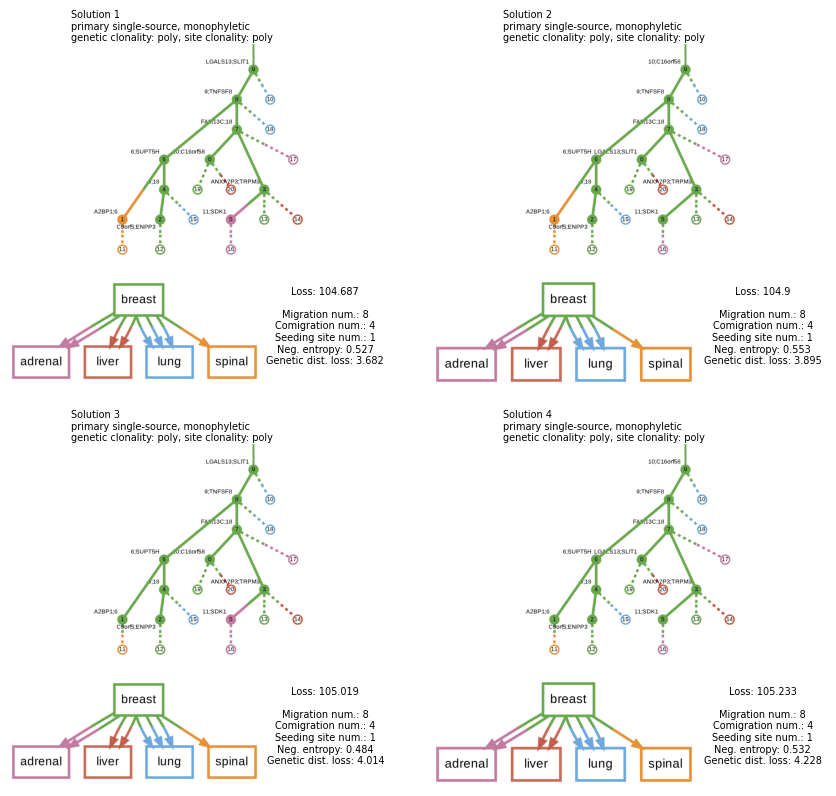

Saving A1_eval_gd_tree1_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016


100%|██████████| 450/450 [00:19<00:00, 225.87it/s]

In [5]:
run_evaluate("A1", custom_colors, weights, "A1_eval_gd")

### Patient A1, maximum parsimony + gen. dist. + organotropism objective

num trees: 2
['breast', 'adrenal', 'liver', 'lung', 'spinal']

TREE 1
organotropism tensor([0.02, 0.01, 0.12, 0.08, 0.06])
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016/tmp_A1_eval_gd_organo_tree1_clustered_SNVs.tsv
ordered_sites ['breast', 'adrenal', 'liver', 'lung', 'spinal']
calculate_batch_size 264


 95%|█████████▌| 428/450 [00:02<00:00, 228.26it/s]

Time elapsed: 2.681374
full solution set size: 298
pareto_metrics {(9, 4, 1)}
# final solutions: 4
A1_eval_gd_organo_tree1_breast
20 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

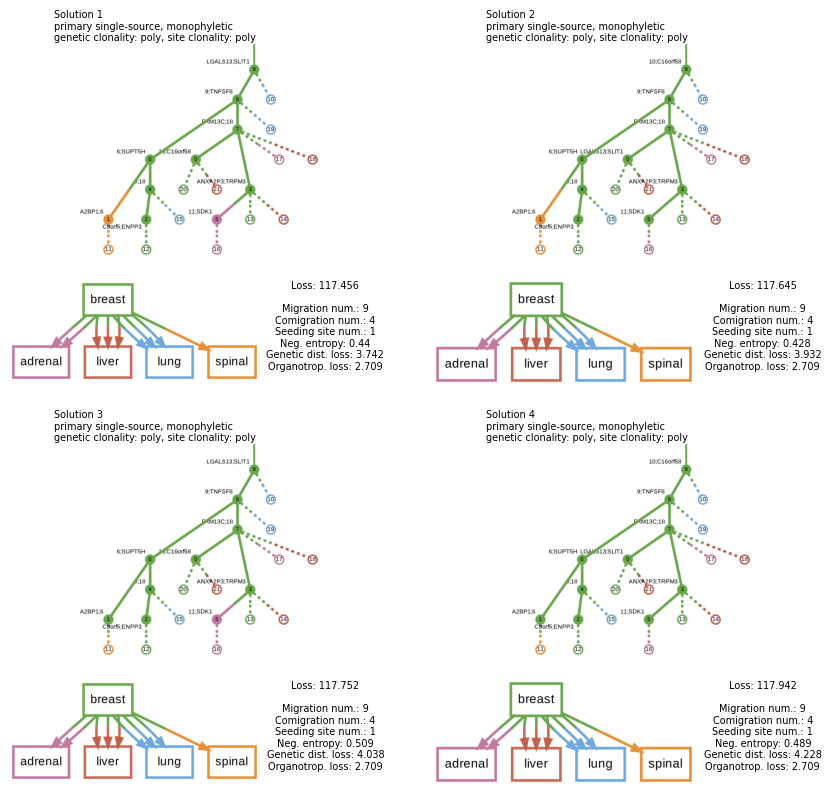

Saving A1_eval_gd_organo_tree1_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016


In [6]:
run_evaluate("A1", custom_colors, organo_weights, "A1_eval_gd_organo")

### Patient A7, evaluate mode, maximum parsimony + gen. dist. objective

num trees: 1
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']

TREE 1
organotropism tensor([0.02, 0.06, 0.01, 0.12, 0.08, 0.17])
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016/tmp_A7_eval_gd_tree1_clustered_SNVs.tsv
ordered_sites ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
calculate_batch_size 304


 94%|█████████▍| 422/450 [00:01<00:00, 279.03it/s]

Time elapsed: 2.260775
full solution set size: 276
pareto_metrics {(8, 5, 1), (6, 5, 3), (7, 5, 2)}
# final solutions: 20
A7_eval_gd_tree1_breast


<Figure size 300x300 with 0 Axes>

100%|██████████| 450/450 [00:16<00:00, 279.03it/s]

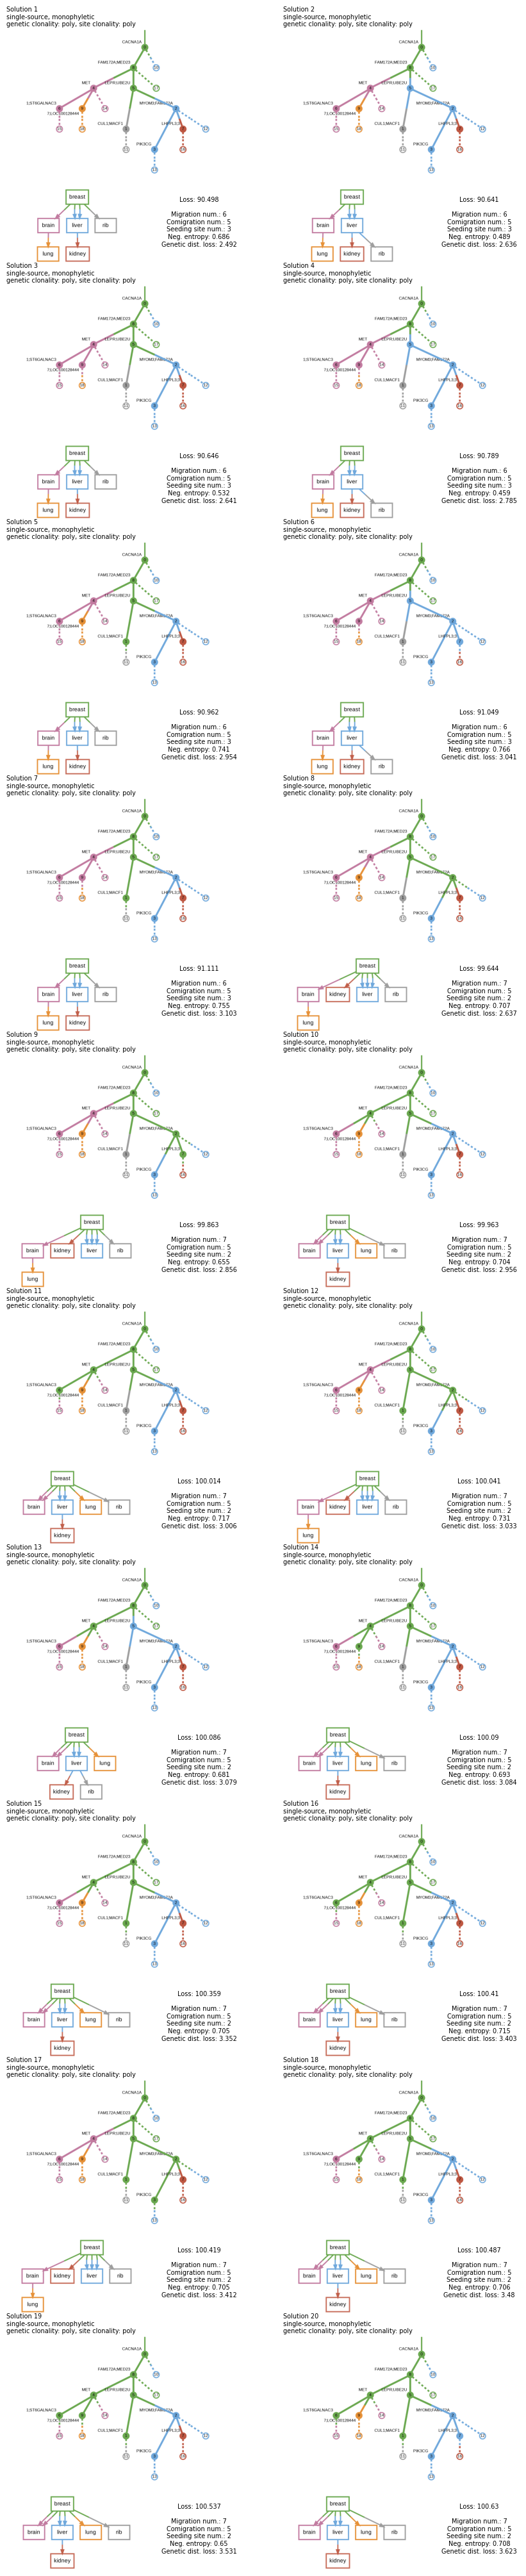

Saving A7_eval_gd_tree1_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016


In [10]:
run_evaluate("A7", custom_colors, weights, "A7_eval_gd")

### Patient A7, evaluate mode, maximum parsimony + gen. dist. + organotropism objective

num trees: 20
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']

TREE 1
organotropism tensor([0.02, 0.06, 0.01, 0.12, 0.08, 0.17])
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016/tmp_A7_eval_gd_organo_tree1_clustered_SNVs.tsv
ordered_sites ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
calculated batch size: 496


  4%|▍         | 17/450 [00:00<00:02, 162.35it/s]

node indices not well estimated []


 99%|█████████▉| 446/450 [00:02<00:00, 177.81it/s]

Time elapsed: 3.355045
pareto_metrics {(8, 5, 1), (6, 5, 3), (7, 5, 2)}
# final solutions: 20
A7_eval_gd_organo_tree1_breast


<Figure size 300x300 with 0 Axes>

100%|██████████| 450/450 [00:17<00:00, 177.81it/s]

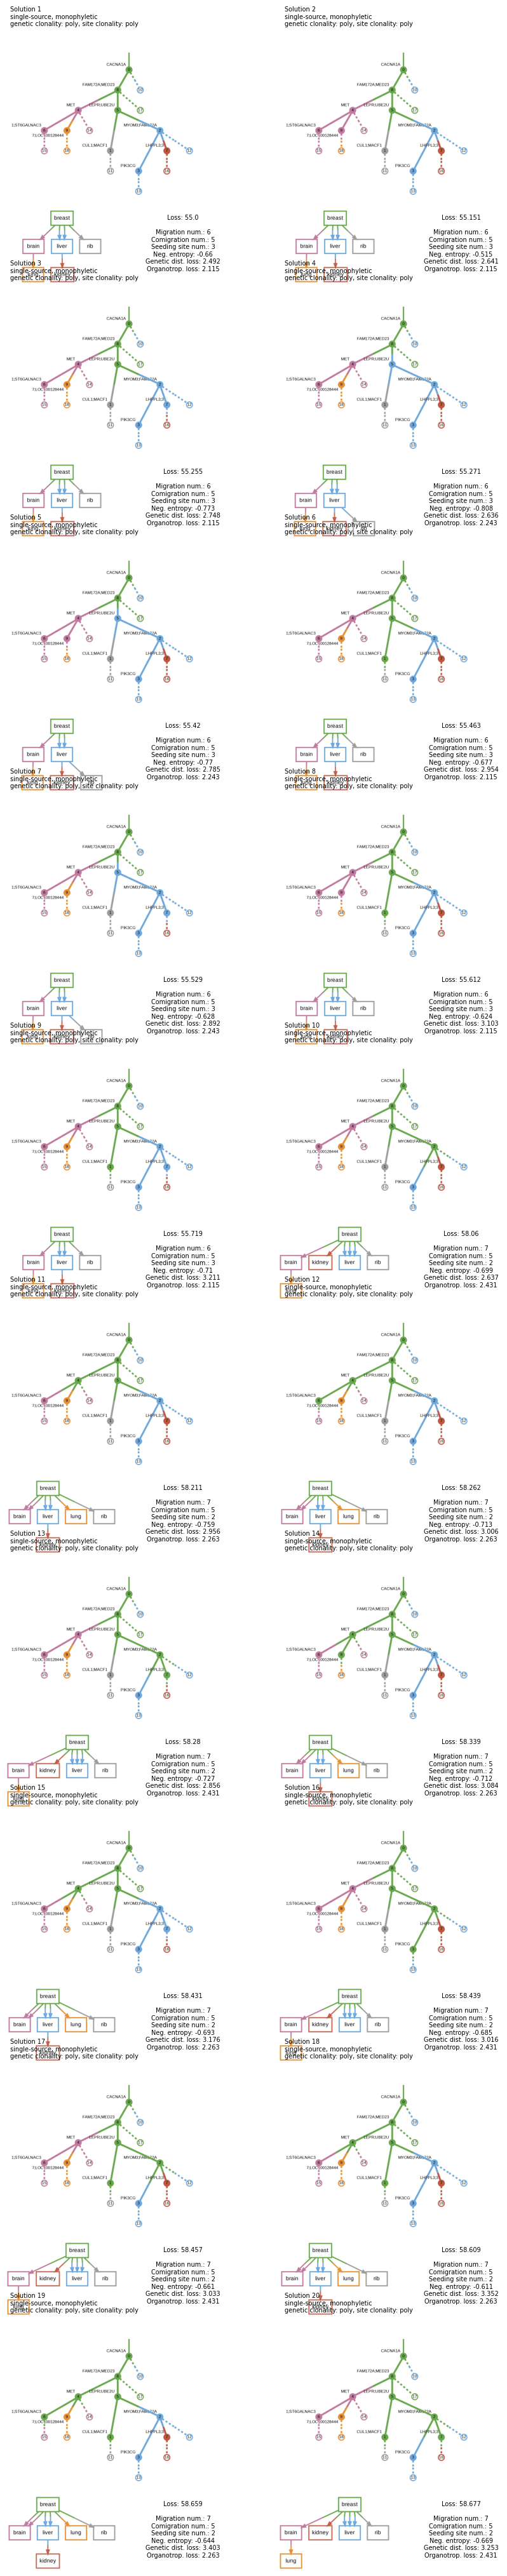

Saving A7_eval_gd_organo_tree1_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016

TREE 2
organotropism tensor([0.02, 0.06, 0.01, 0.12, 0.08, 0.17])
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016/tmp_A7_eval_gd_organo_tree2_clustered_SNVs.tsv
ordered_sites ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
calculated batch size: 496


  4%|▍         | 17/450 [00:00<00:02, 161.59it/s]

node indices not well estimated []


 97%|█████████▋| 437/450 [00:02<00:00, 208.72it/s]

Time elapsed: 3.172532
pareto_metrics {(8, 5, 1), (6, 5, 3), (7, 5, 2)}
# final solutions: 20
A7_eval_gd_organo_tree2_breast


<Figure size 300x300 with 0 Axes>

100%|██████████| 450/450 [00:17<00:00, 208.72it/s]

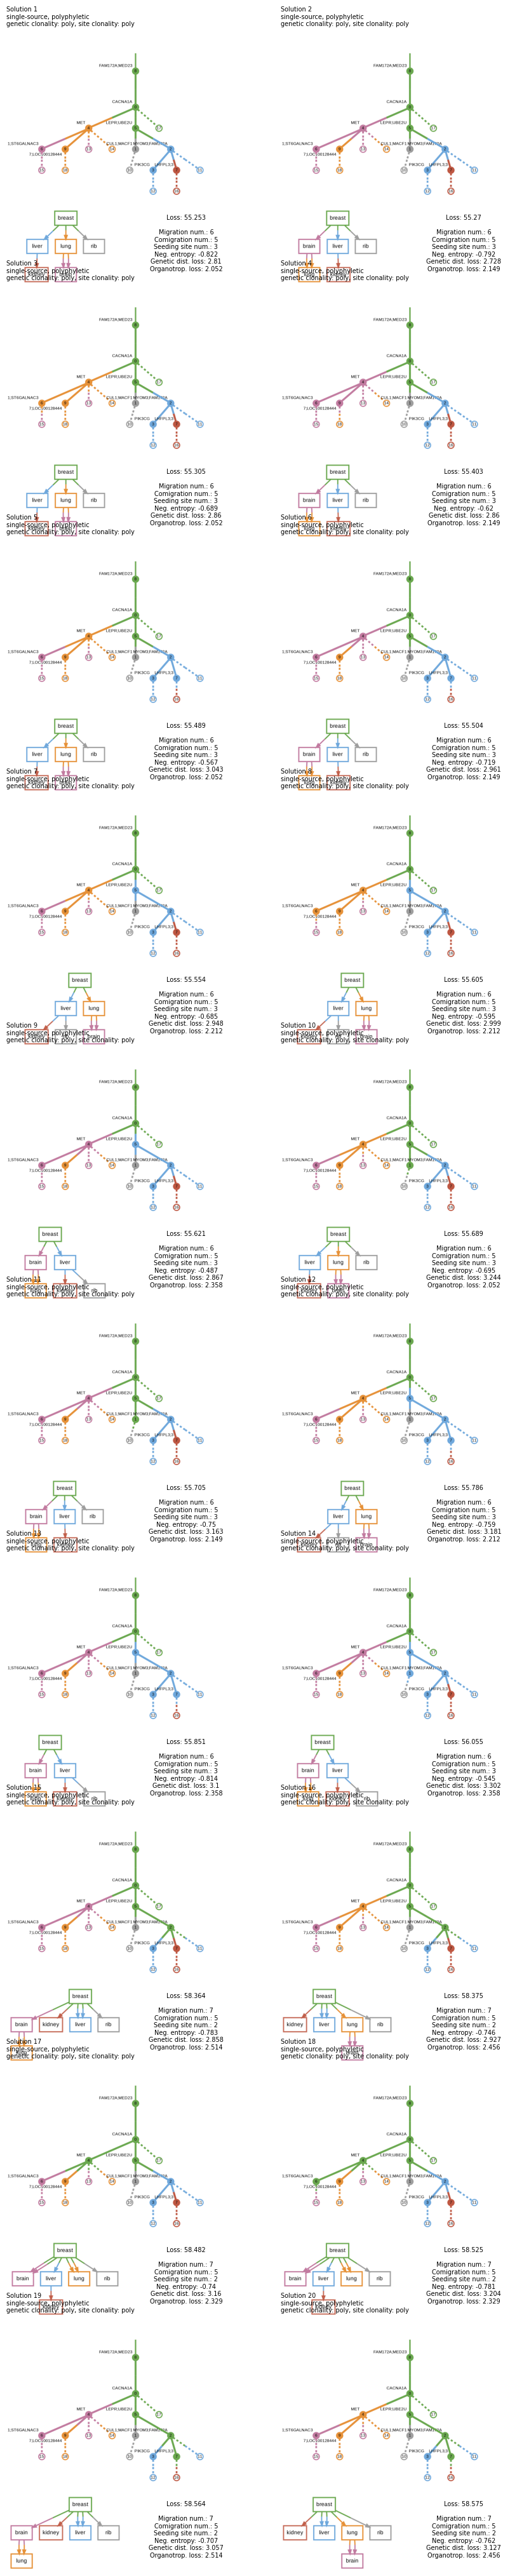

Saving A7_eval_gd_organo_tree2_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016

TREE 3
organotropism tensor([0.02, 0.06, 0.01, 0.12, 0.08, 0.17])
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016/tmp_A7_eval_gd_organo_tree3_clustered_SNVs.tsv
ordered_sites ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
calculated batch size: 496


  4%|▎         | 16/450 [00:00<00:02, 156.62it/s]

node indices not well estimated []


 97%|█████████▋| 438/450 [00:02<00:00, 171.41it/s]

Time elapsed: 3.269373
pareto_metrics {(7, 5, 2), (6, 6, 3), (8, 5, 1)}
# final solutions: 20
A7_eval_gd_organo_tree3_breast


<Figure size 300x300 with 0 Axes>

100%|██████████| 450/450 [00:18<00:00, 171.41it/s]

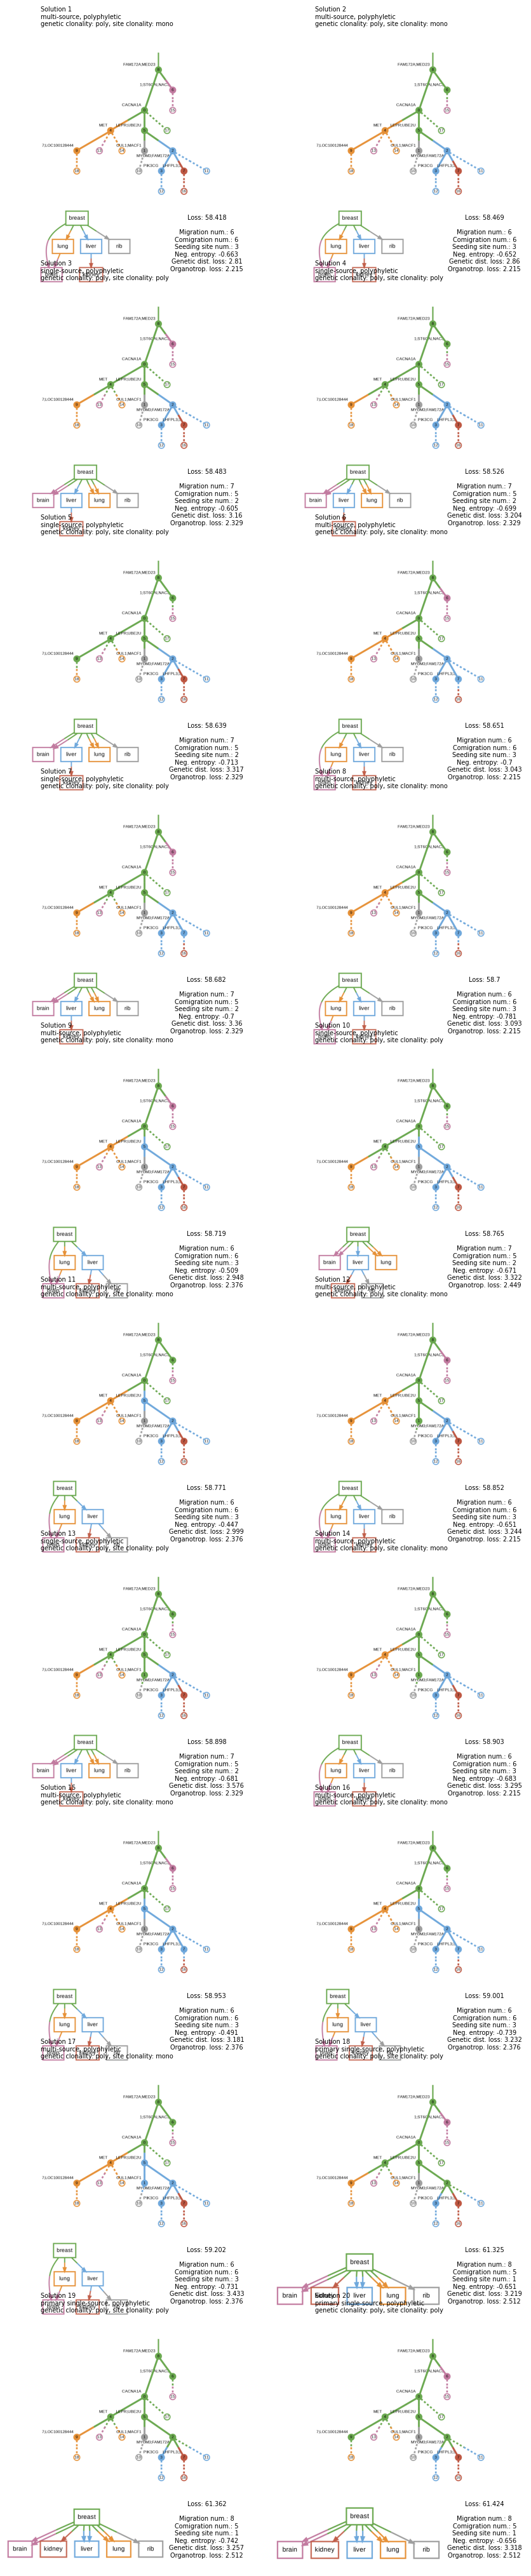

Saving A7_eval_gd_organo_tree3_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016

TREE 4
organotropism tensor([0.02, 0.06, 0.01, 0.12, 0.08, 0.17])
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016/tmp_A7_eval_gd_organo_tree4_clustered_SNVs.tsv
ordered_sites ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
calculated batch size: 496


  4%|▎         | 16/450 [00:00<00:02, 157.48it/s]

node indices not well estimated []


 98%|█████████▊| 439/450 [00:02<00:00, 172.95it/s]

Time elapsed: 3.246485
pareto_metrics {(8, 5, 2), (7, 5, 3), (9, 5, 1)}
# final solutions: 20
A7_eval_gd_organo_tree4_breast


<Figure size 300x300 with 0 Axes>

100%|██████████| 450/450 [00:19<00:00, 172.95it/s]

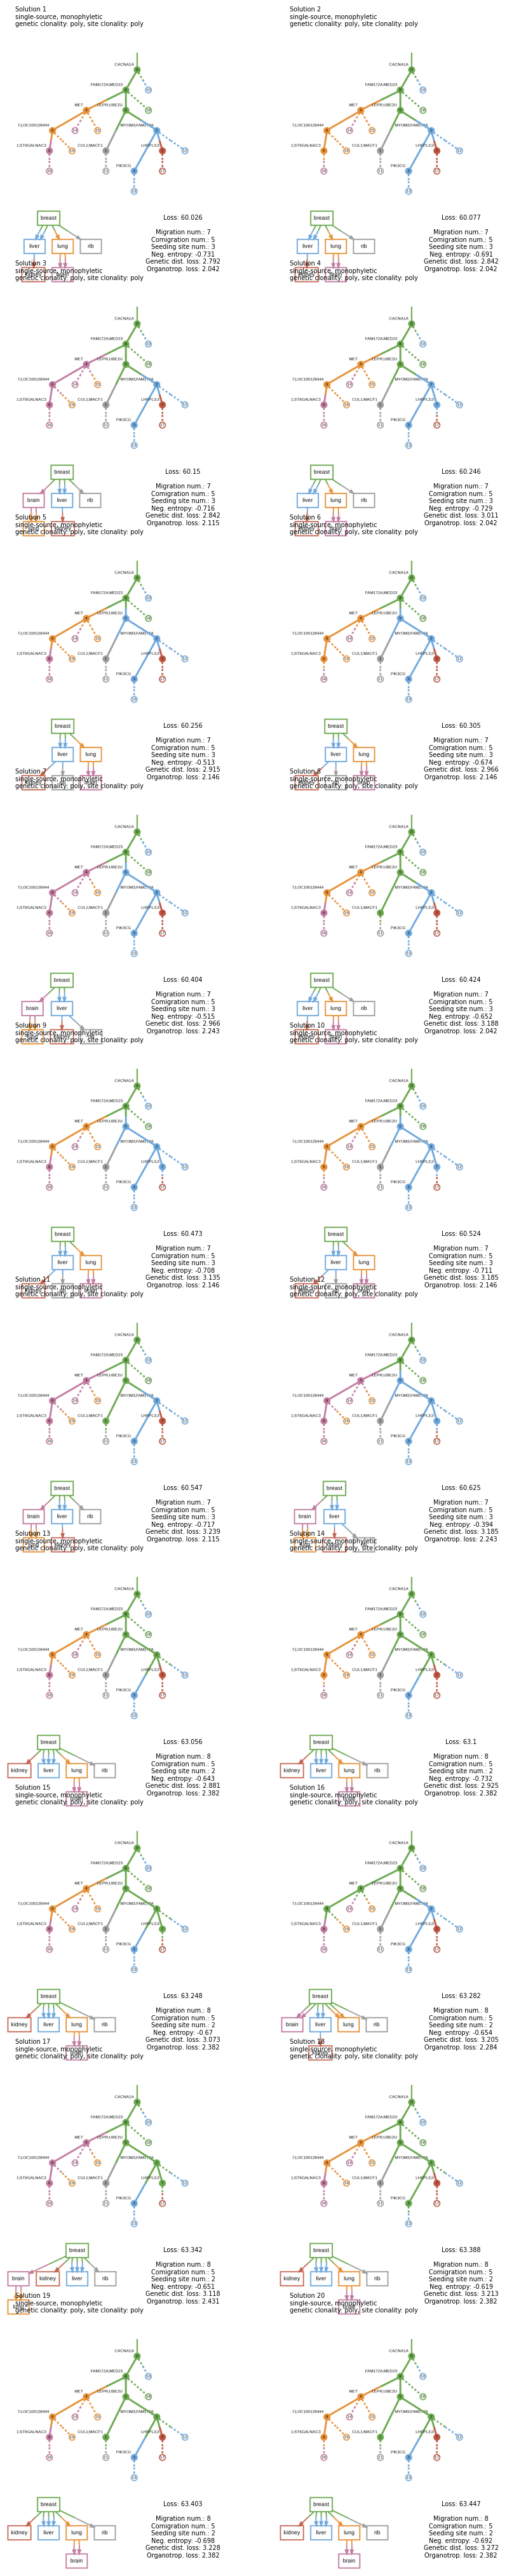

Saving A7_eval_gd_organo_tree4_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016

TREE 5
organotropism tensor([0.02, 0.06, 0.01, 0.12, 0.08, 0.17])
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016/tmp_A7_eval_gd_organo_tree5_clustered_SNVs.tsv
ordered_sites ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
calculated batch size: 496


  4%|▎         | 16/450 [00:00<00:02, 157.24it/s]

node indices not well estimated []


 98%|█████████▊| 439/450 [00:02<00:00, 172.73it/s]

Time elapsed: 3.232512
pareto_metrics {(8, 5, 1), (6, 5, 3), (7, 5, 2)}
# final solutions: 20
A7_eval_gd_organo_tree5_breast


<Figure size 300x300 with 0 Axes>

100%|██████████| 450/450 [00:19<00:00, 172.73it/s]

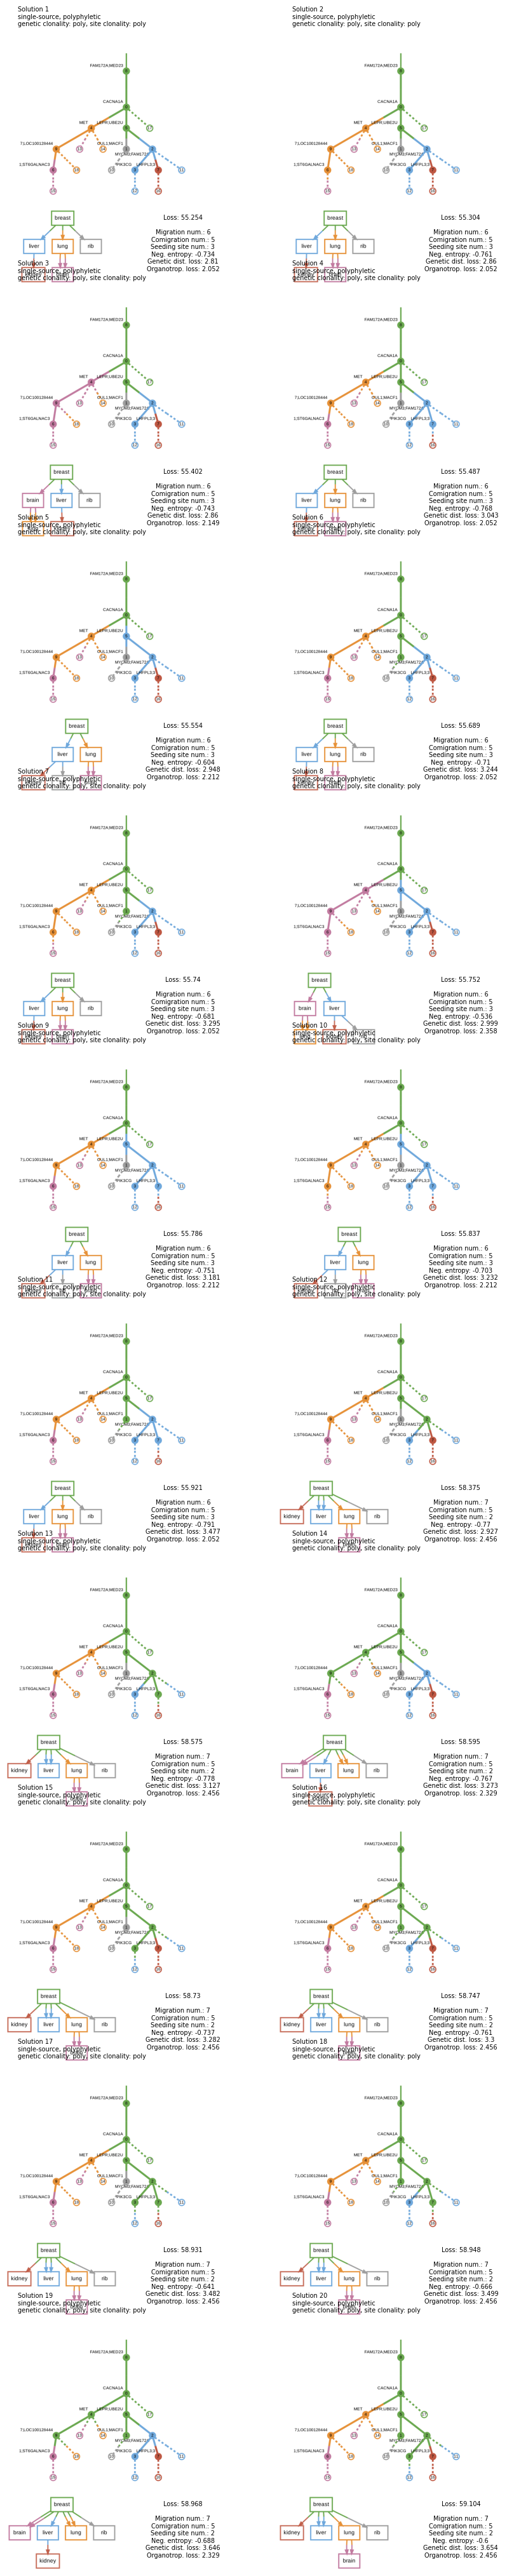

Saving A7_eval_gd_organo_tree5_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016

TREE 6
organotropism tensor([0.02, 0.06, 0.01, 0.12, 0.08, 0.17])
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016/tmp_A7_eval_gd_organo_tree6_clustered_SNVs.tsv
ordered_sites ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
calculated batch size: 496


  4%|▎         | 16/450 [00:00<00:02, 159.10it/s]

node indices not well estimated []


 98%|█████████▊| 439/450 [00:02<00:00, 174.76it/s]

Time elapsed: 3.198977
pareto_metrics {(6, 5, 2), (7, 5, 1)}
# final solutions: 14
A7_eval_gd_organo_tree6_breast
20 unique trees were not found (14 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

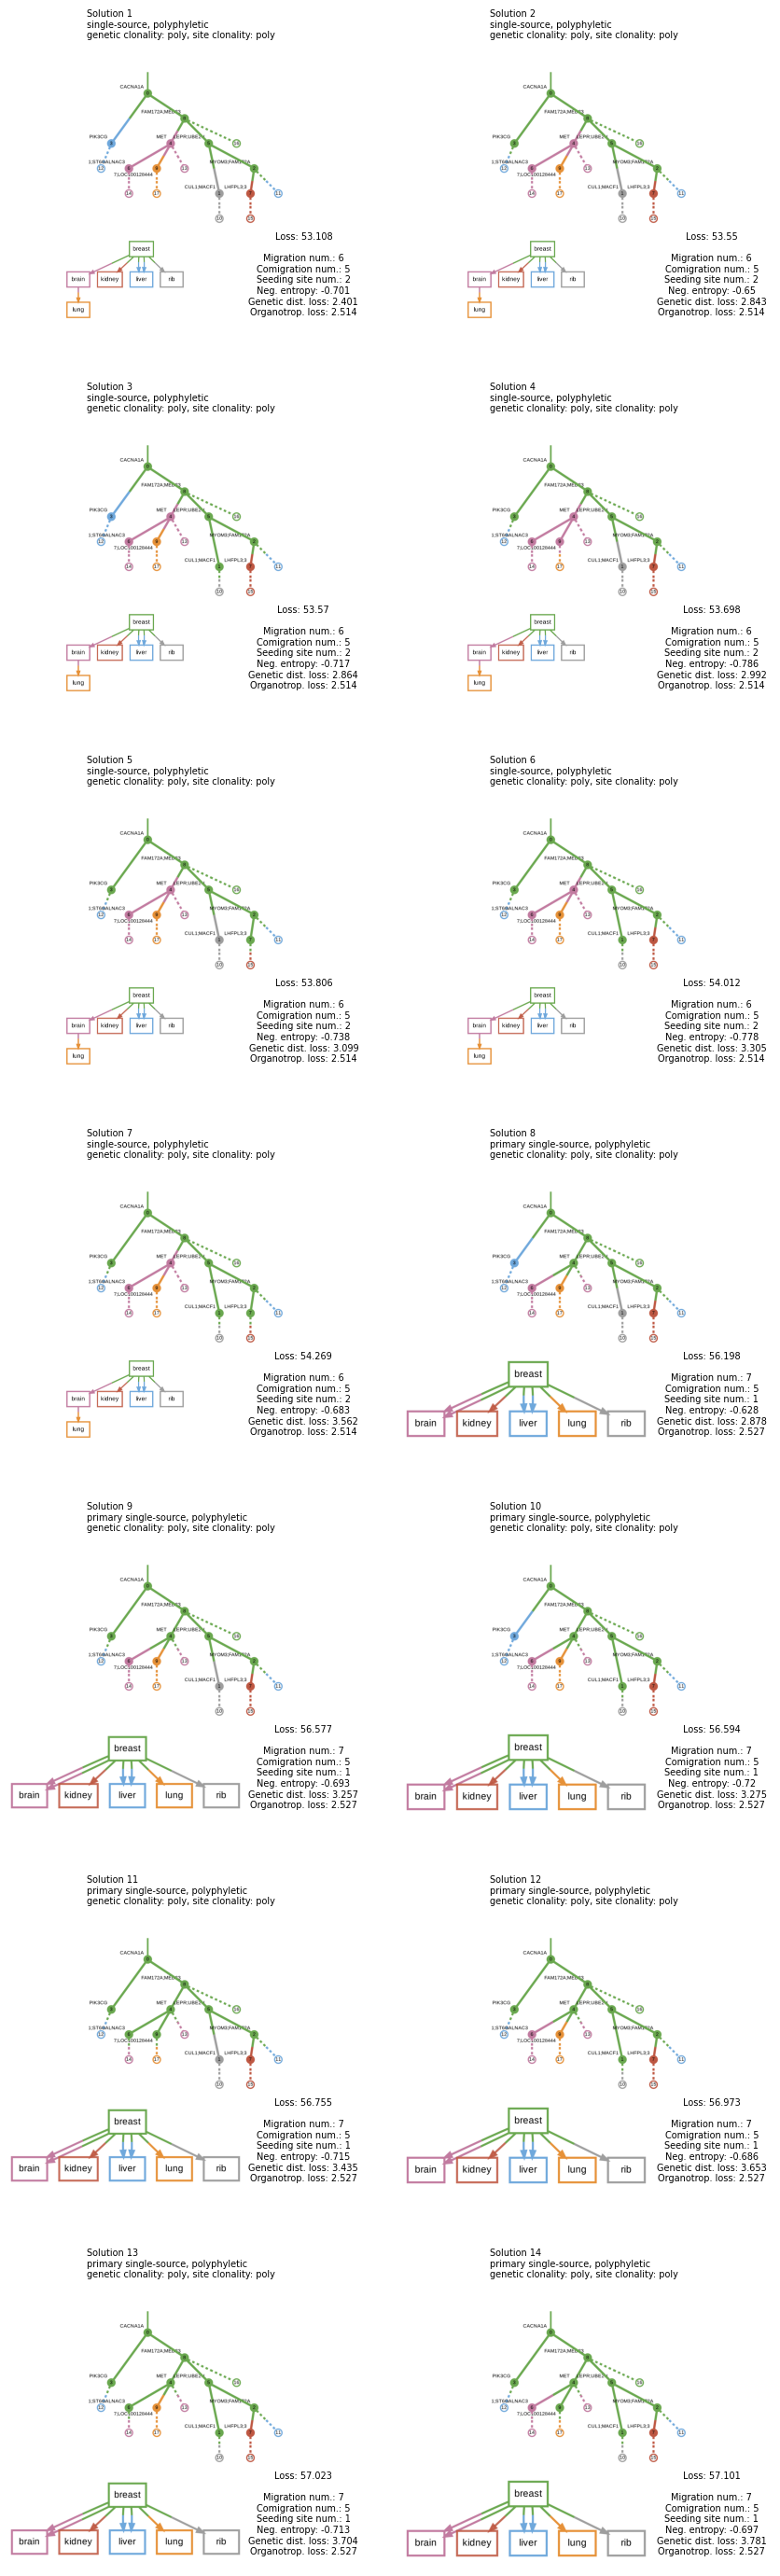

100%|██████████| 450/450 [00:20<00:00, 174.76it/s]

Saving A7_eval_gd_organo_tree6_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016

TREE 7
organotropism tensor([0.02, 0.06, 0.01, 0.12, 0.08, 0.17])
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016/tmp_A7_eval_gd_organo_tree7_clustered_SNVs.tsv
ordered_sites ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
calculated batch size: 496


  4%|▎         | 16/450 [00:00<00:02, 152.99it/s]

node indices not well estimated []


100%|██████████| 450/450 [00:02<00:00, 167.10it/s]

Time elapsed: 3.337501
pareto_metrics {(8, 5, 1), (6, 6, 3), (7, 5, 2)}
# final solutions: 19
A7_eval_gd_organo_tree7_breast
20 unique trees were not found (19 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

100%|██████████| 450/450 [00:15<00:00, 167.10it/s]

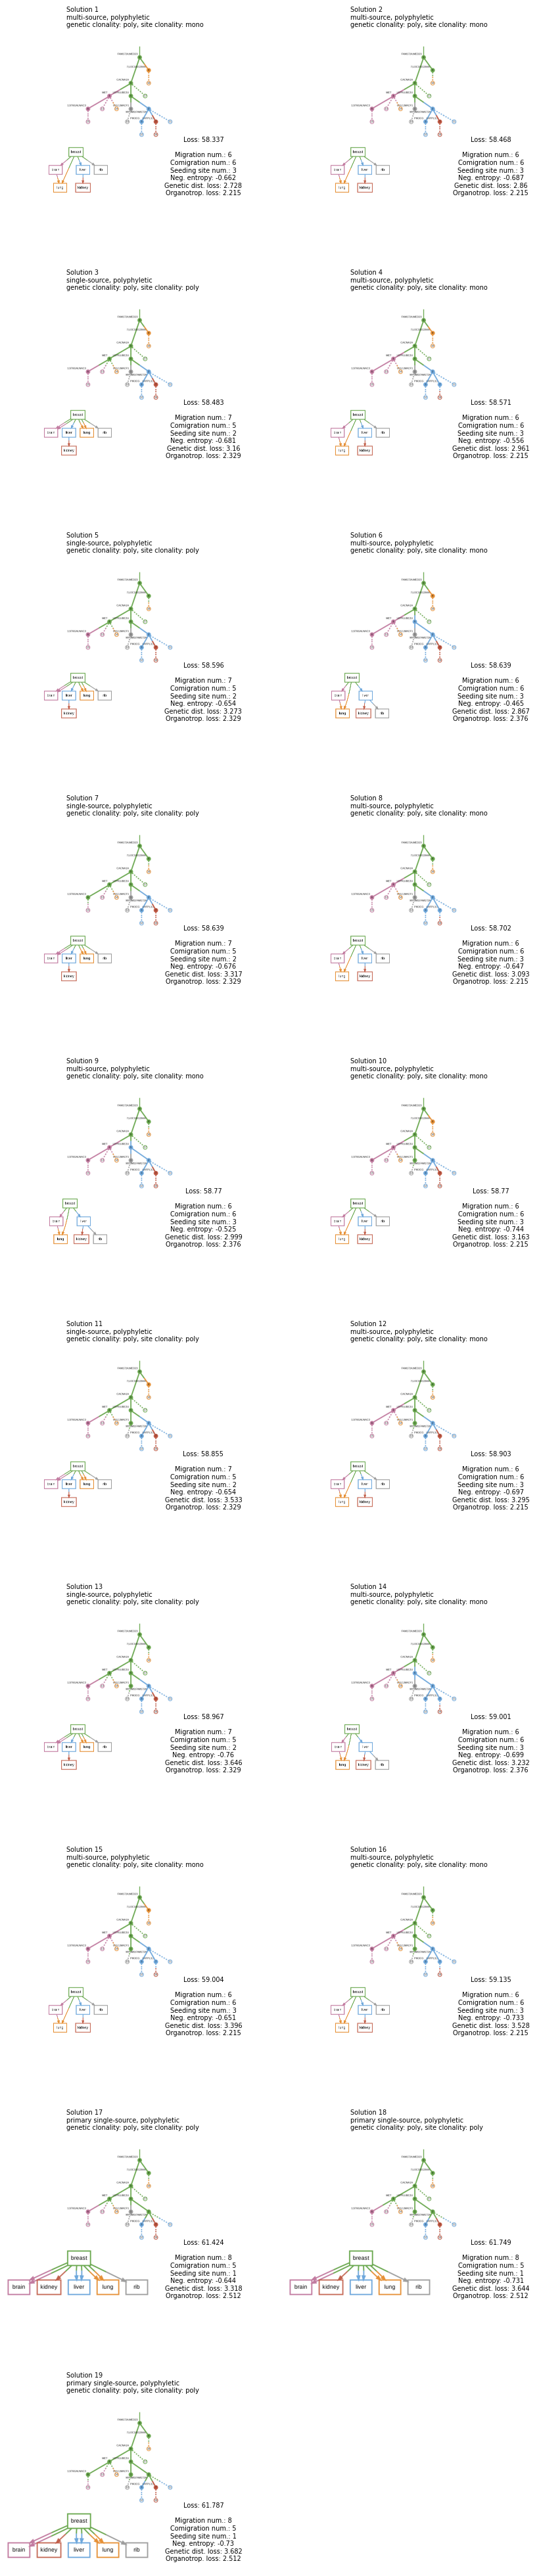

Saving A7_eval_gd_organo_tree7_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016

TREE 8
organotropism tensor([0.02, 0.06, 0.01, 0.12, 0.08, 0.17])
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016/tmp_A7_eval_gd_organo_tree8_clustered_SNVs.tsv
ordered_sites ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
calculated batch size: 496


  0%|          | 2/450 [00:00<00:22, 19.81it/s]

node indices not well estimated [6]


100%|█████████▉| 448/450 [00:02<00:00, 181.33it/s]

Time elapsed: 3.195697
pareto_metrics {(8, 5, 1), (6, 5, 3), (7, 5, 2)}
# final solutions: 20
A7_eval_gd_organo_tree8_breast


<Figure size 300x300 with 0 Axes>

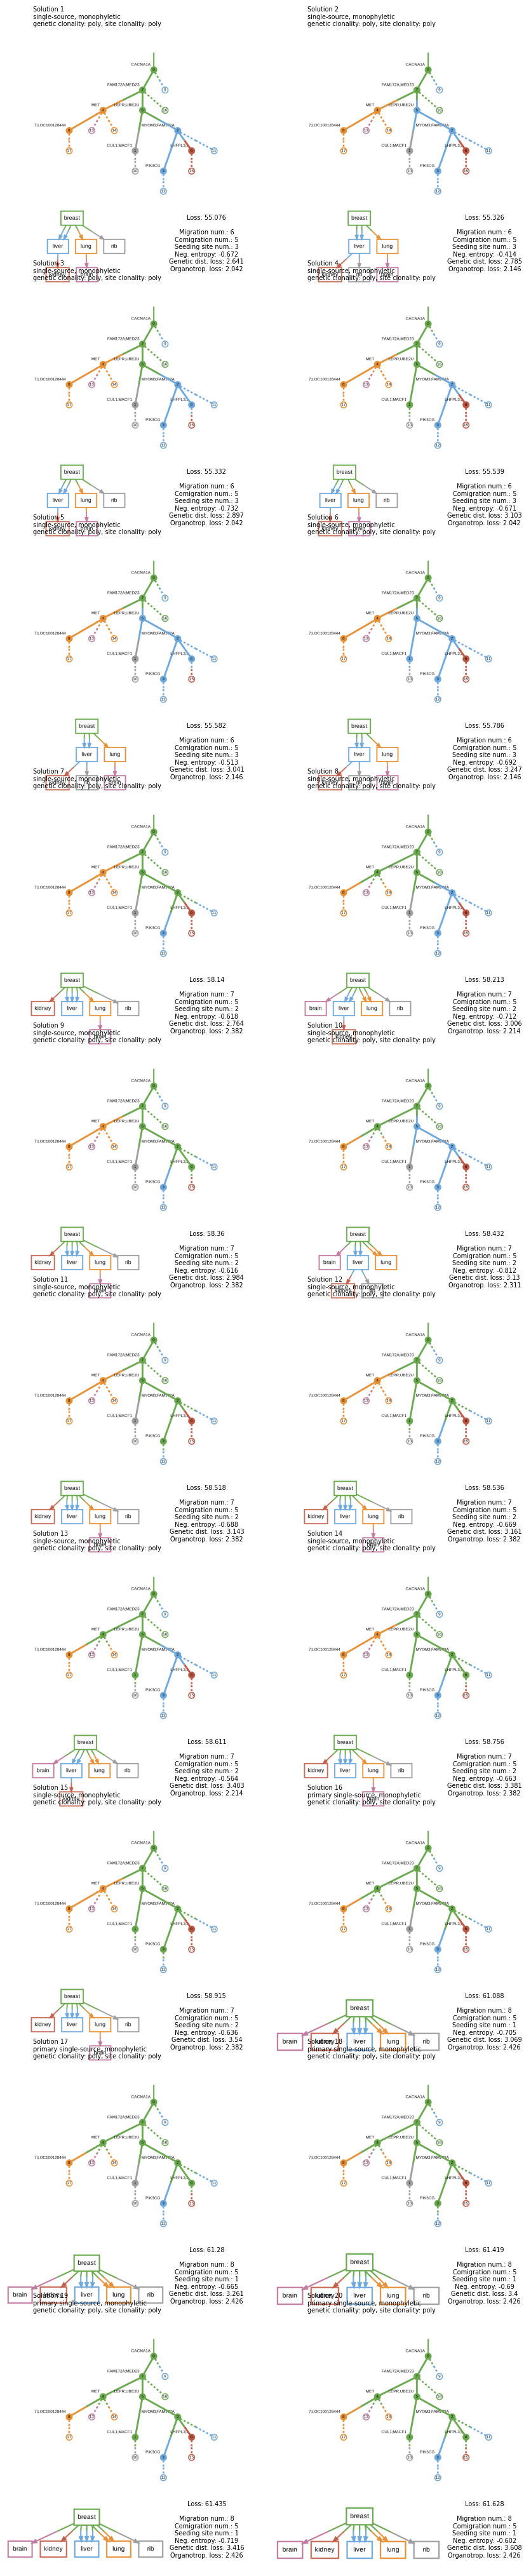

100%|██████████| 450/450 [00:21<00:00, 181.33it/s]

Saving A7_eval_gd_organo_tree8_breast to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016

TREE 9
organotropism tensor([0.02, 0.06, 0.01, 0.12, 0.08, 0.17])
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/migration_history_running/../../data/hoadley_breast_cancer_2016/tmp_A7_eval_gd_organo_tree9_clustered_SNVs.tsv
ordered_sites ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
calculated batch size: 496


  5%|▍         | 21/450 [00:00<00:02, 207.81it/s]

node indices not well estimated [6]


 98%|█████████▊| 440/450 [00:02<00:00, 220.56it/s]

Time elapsed: 2.641003
pareto_metrics {(5, 5, 3), (6, 5, 2), (7, 5, 1)}
# final solutions: 19
A7_eval_gd_organo_tree9_breast
20 unique trees were not found (19 were found). Retry with a higher sample size if you want to get more trees.


In [ ]:
run_evaluate("A7", custom_colors, organo_weights, "A7_eval_gd_organo")